# Final Project
### Halina Vercessi-Clarke and Hannah Nguyen

In [175]:
#importing the libraries
import os 
import cv2
import numpy as np
from skimage import io
import tensorflow as tf
tf.config.experimental_run_functions_eagerly(True)
import matplotlib.pyplot as plt
%matplotlib inline
import math
import pathlib
from tensorflow.keras import layers
from keras.utils import to_categorical

#importing scikit learning modules
from sklearn.model_selection import train_test_split


In [14]:

# file_path = 'C:/Users/Halina/Documents/GitHub/Fashion-throughout-the-Years/images'
file_path = os.getcwd() + '\images'
data = [] 
labels = []
i = 0
label_names = os.listdir(file_path)
classes = []
for root, dirs, files in os.walk(file_path):
    path = str(root).replace(str(chr(92)), "/")
    if (path.split("/")[-1]!='images'):
        for img in os.listdir(path):
            # print(label_names[i])
            pic = cv2.imread(os.path.join(path,img))
            #print(img)
            
    
#             input_arr = np.array([input_arr])  # Convert single image to a batch
            pic = cv2.resize(pic,(80,80))
            pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
            data.append(pic)
            
#             pic = tf.keras.preprocessing.image.load_img(os.path.join(path,img), grayscale=False, color_mode="rgb", target_size=(80,80), interpolation="nearest")
#             input_arr = tf.keras.preprocessing.image.img_to_array(pic)
#             data.append(input_arr)


            classes.append([label_names[i].split(" ")[0]])
            labels.append([i])
        i+=1
        

In [15]:
len(classes)
classes[0:25]

[['1820'],
 ['1820'],
 ['1820'],
 ['1820'],
 ['1820'],
 ['1820'],
 ['1820'],
 ['1820'],
 ['1820'],
 ['1820'],
 ['1820'],
 ['1820'],
 ['1820'],
 ['1820'],
 ['1820'],
 ['1830'],
 ['1830'],
 ['1830'],
 ['1830'],
 ['1830'],
 ['1830'],
 ['1830'],
 ['1830'],
 ['1830'],
 ['1830']]

In [16]:
len(labels)
labels[0:25]

[[0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1]]

In [22]:
data = np.asarray(data)
labels = np.asarray(labels)
#print(data[344])
#print(labels[344])
#data[0].flatten()

In [23]:
print(data[344].shape)
#plt.imshow(saved[0].reshape(80,80,3))
#data[344]

(80, 80, 3)


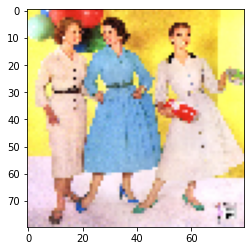

In [25]:
plt.imshow(data[344].reshape(80, 80, 3))

In [26]:
# Split the dataset
train_images, test_images, train_labels, test_labels = train_test_split(data, labels, test_size = 0.25, random_state = 0)

In [27]:
train_images.shape

(975, 80, 80, 3)

In [28]:
test_images.shape

(325, 80, 80, 3)

In [29]:
train_labels.shape

(975, 1)

In [30]:
test_labels.shape

(325, 1)

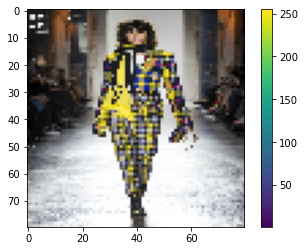

In [31]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [32]:
train_images = train_images / 255.0

test_images = test_images / 255.0


In [77]:
# print(classes[train_labels[0][0]][0])
# plt.figure(figsize=(10,10))
# for i in range(25):
#     plt.subplot(5,5,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(train_images[i], cmap=plt.cm.binary)
#     plt.xlabel(classes[train_labels[i][0]][0])
# plt.show()


In [171]:
train_labels = to_categorical(train_labels, 87)
test_labels = to_categorical(test_labels, 87)
print(train_labels[0])


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [176]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Flatten(input_shape=(80, 80, 3)),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(87)
# ])

# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Conv2D(32, (5, 5), activation='relu', input_shape=(80,80,3)))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(tf.keras.layers.Conv2D(64, (5, 5), activation='relu'))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(1000, activation='relu'))
# model.add(tf.keras.layers.Dropout(0.5))
# model.add(tf.keras.layers.Dense(500, activation='relu'))
# model.add(tf.keras.layers.Dropout(0.5))
# model.add(tf.keras.layers.Dense(250, activation='relu'))
# model.add(tf.keras.layers.Dense(87, activation='softmax'))

# model = tf.keras.Sequential([
#     tf.keras.layers.Conv2D(32, (5, 5), activation='relu', input_shape=(80,80,3)), 
#     tf.keras.layers.MaxPooling2D(pool_size=(2, 2)), 
    
#     tf.keras.layers.Conv2D(64, (5, 5), activation='relu'), 
#     tf.keras.layers.MaxPooling2D(pool_size=(2, 2)), 
    
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dropout(0.5), 
#     tf.keras.layers.Dense(87, activation='softmax')
# ])

datagen = keras.ImageDataGenerator(rescale=1.0/255.0)
train_iterator = datagen.flow(train_images, train_labels, batch_size=1)
test_iterator = datagen.flow(test_images, test_labels, batch_size=1)

NameError: name 'keras' is not defined

model = Sequential([  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),  layers.Conv2D(16, 3, padding='same', activation='relu'),  layers.MaxPooling2D(),  layers.Conv2D(32, 3, padding='same', activation='relu'),  layers.MaxPooling2D(),  layers.Conv2D(64, 3, padding='same', activation='relu'),  layers.MaxPooling2D(),  layers.Flatten(),  layers.Dense(128, activation='relu'),  layers.Dense(num_classes)])



In [166]:
model.compile(loss='mean_squared_error', 
              optimizer='adam',
              metrics=['accuracy'])

In [167]:
hist = model.fit(train_images, train_labels, batch_size=1, epochs=10)

ValueError: Data cardinality is ambiguous:
  x sizes: 2925
  y sizes: 975
Please provide data which shares the same first dimension.

In [94]:
model.evaluate(test_images, test_labels_one_hot, batch_size=1)

325/325 [==============================] - 6s 17ms/step - loss: 4.5249 - accuracy: 0.0000e+00


[4.524944305419922, 0.0]

In [ ]:
#Visualize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()